In [7]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# 一. 对假设的数据进行降噪

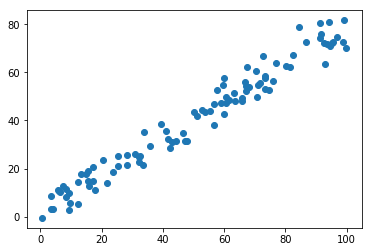

In [4]:
X = np.empty(shape=[100,2])
X[:,0] = np.random.uniform(0.,100.,size = 100)
X[:,1] = 0.75*X[:,0] + 3. + np.random.normal(0.,4.,size=100)
plt.scatter(X[:,0], X[:,1])

In [5]:
pca = PCA(n_components=0.9)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)
pca.n_components_

1

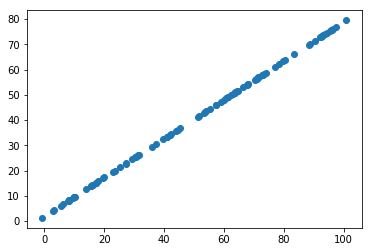

In [6]:
plt.scatter(X_restore[:,0], X_restore[:,1])

# 二. 对digit数据进行降噪

In [10]:
from sklearn import datasets
mydigits = datasets.load_digits()
mydigits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [13]:
Xd = mydigits.data 
# 加噪音
Xd = Xd + np.random.normal(0., 4., size = Xd.shape)
yd = mydigits.target

In [14]:
Xd.shape

(1797, 64)

In [15]:
yd.shape

(1797,)

In [21]:
# 从每个类别（0-9）中各选出10个样例,可视化
digits_noise_example = Xd[y==0,:][:10,:]
digits_noise_example.shape

(10, 64)

In [23]:
for num in range(1,10):
    num_example = Xd[y==num, :][:10,:]
    digits_noise_example = np.vstack([digits_noise_example,num_example])


In [24]:
digits_noise_example.shape

(100, 64)

In [29]:
def plot_digits(data):
    fig, axes =plt.subplots(10,10,figsize = (10,10),
                           subplot_kw = {'xticks' :[], 'yticks' :[]},
                           gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap = 'binary', interpolation = 'nearest',
                 clim = (0,16))
    plt.show()

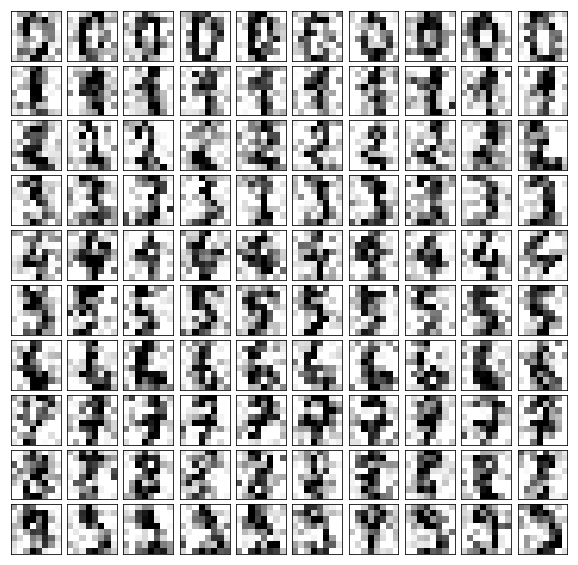

In [30]:
plot_digits(digits_noise_example)

可以看到图片中是含有很多噪音的,我们肉眼可能不能识别出来某张图片中的数字    
故需要对其进行降噪处理   

In [33]:
# 通过可视化,可以看出数字的噪音比较大,因此多丢弃一些没用的信息
pca1 = PCA(n_components=0.5)
pca1.fit(X)
X_reduction = pca1.transform(X)
X_restore = pca1.inverse_transform(X_reduction)
pca1.n_components_

12

In [35]:
X_restore.shape

(1797, 64)

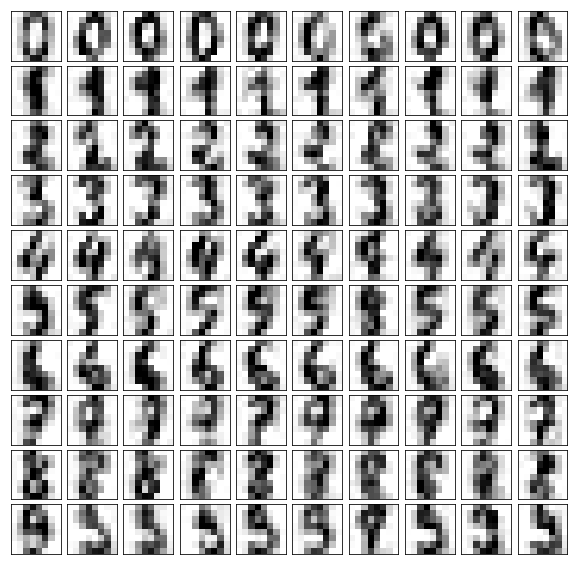

In [37]:
# 从每个类别（0-9）中各选出10个样例,可视化
digits_example = X_restore[y==0,:][:10,:]
for num in range(1,10):
    num_example = X_restore[y==num, :][:10,:]
    digits_example = np.vstack([digits_example,num_example])
plot_digits(digits_example)

这次看来,图像是不是看起来干净了许多?